In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import pickle
sns.set()

In [2]:
# Loading the dataset into variable 'data'
data = pd.read_csv("diabetes-dataset.csv")

In [3]:
f_values = {}
for i in data.columns:
    count = data[i].nunique()
    if count == 1:
        f_values[i] = count

cols_drop = list(f_values.keys())
print('Columns to drop are: ',cols_drop)

Columns to drop are:  []


In [4]:
# Overview of data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
# Display the first few rows to understand the structure of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [6]:
# Check unique values in the 'gender' column
print(data['gender'].unique())

['Female' 'Male' 'Other']


In [7]:
# Data cleaning
# Drop rows with missing values
# Convert 'Female' to 0 and 'Male' to 1

# Drop rows with missing values
data.dropna(subset=['gender'], inplace=True)

# Convert 'Female' to 0 and 'Male' to 1, and handle remaining NaN values
data['gender'] = data['gender'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)

# Convert 'Female' to 0 and 'Male' to 1, and handle remaining NaN values
# data['smoking_history'] = data['smoking_history'].fillna('Other').map({'Female': 0, 'Male': 1, 'Other': -1}).astype(int)


data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


In [8]:
# Data cleaning
# # Drop rows with missing values
# data.dropna(inplace=True)
# # Convert categorical variables into dummy/indicator variables if needed
# data = pd.get_dummies(data, columns=['gender', 'smoking_history'])
# data.head()

data['smoking_history'] = data['smoking_history'].map({'never': 0, 'current': 1,  'ever': 1, 'not current': 1, 'former': 1, 'No Info': 2})
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [9]:
column_names = data.columns
print(column_names)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [10]:
# # Pairplot figure to show correlation betweean features
# sns.set(style='ticks', color_codes=True)
# figs = sns.pairplot(data, palette = ('g', 'r'), hue='diabetes', height=1.5)
# plt.show()

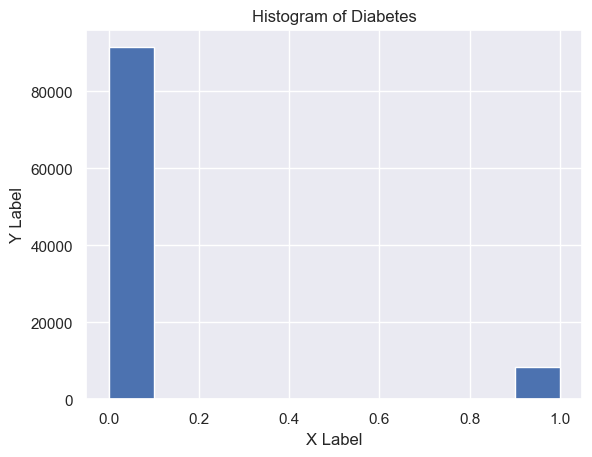

In [11]:
# Example: Histogram
plt.hist(data['diabetes'], bins=10)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Histogram of Diabetes')
plt.show()

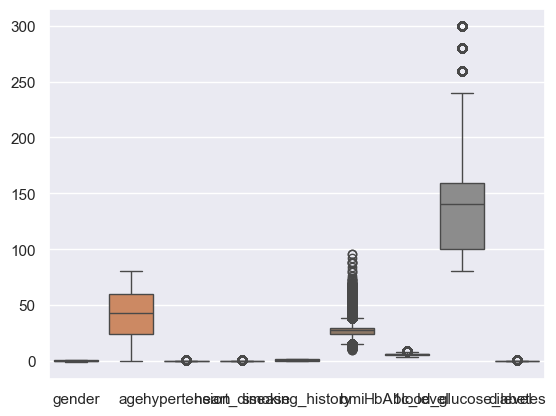

In [12]:
sns.boxplot(data=data)
plt.show()

In [13]:
# Define custom summary statistics function
def custom_summary_statistics(data):
    # Compute mean, median, standard deviation, etc.
    mean = data.mean()
    median = data.median()
    std = data.std()
    # Add more summary statistics as needed
    return mean, median, std

# Assuming 'data' is your DataFrame
mean, median, std = custom_summary_statistics(data)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std)

Mean: gender                   0.414120
age                     41.885856
hypertension             0.074850
heart_disease            0.039420
smoking_history          1.007210
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
diabetes                 0.085000
dtype: float64
Median: gender                   0.00
age                     43.00
hypertension             0.00
heart_disease            0.00
smoking_history          1.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64
Standard Deviation: gender                  0.492937
age                    22.516840
hypertension            0.263150
heart_disease           0.194593
smoking_history         0.842060
bmi                     6.636783
HbA1c_level             1.070672
blood_glucose_level    40.708136
diabetes                0.278883
dtype: float64


In [14]:

# Define features (X) and target variable (y)
# X = data[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
#         'gender_Female', 'gender_Male', 'smoking_history_No Info', 'smoking_history_current', 'smoking_history_never']]

X = data.drop('diabetes', axis=1)
y = data['diabetes']

data.head()
# y = data['diabetes']

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,2,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [18]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

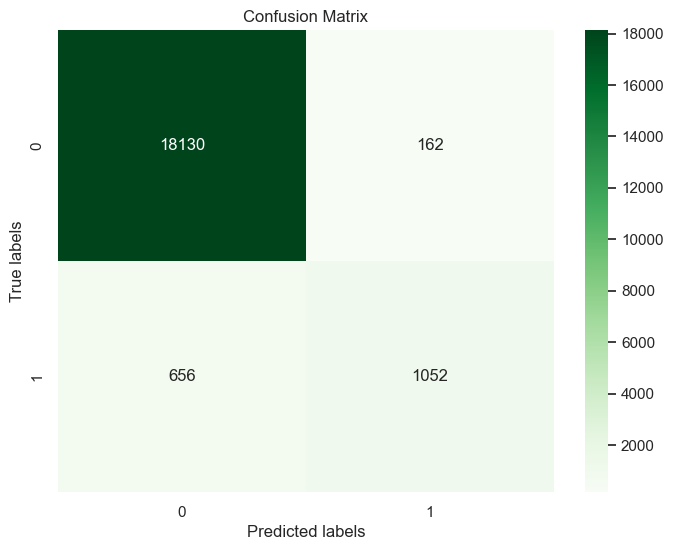

In [20]:
# Make predictions on the test set
# y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# assigning values to True Positives, False Negative etc
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# sensitivity score = TP/ (TP+FN)
sensitivity = TP/ (TP+FN)
print(sensitivity)

0.6159250585480094


In [22]:
# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

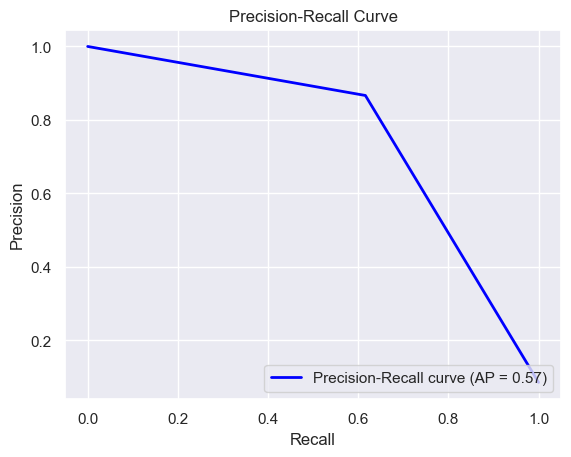

In [23]:
# Plot Precision-Recall curve
plt.figure()
lw = 2
plt.plot(recall, precision, color='blue', lw=lw, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

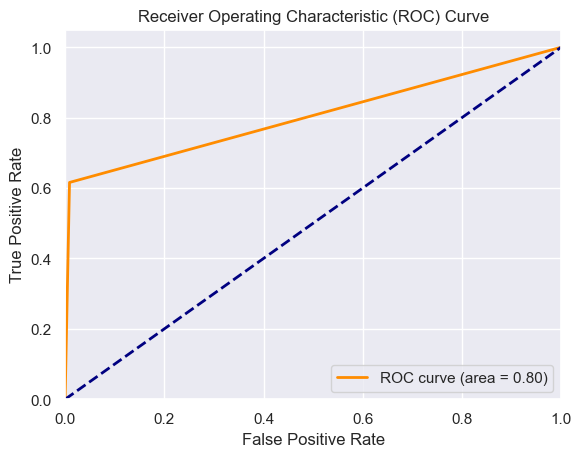

In [25]:
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

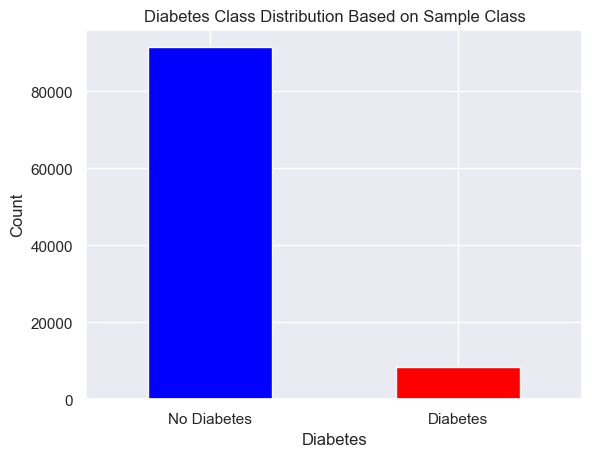

In [26]:
data['diabetes'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution Based on Sample Class')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'], rotation=0)
plt.show()

In [27]:
print("The accuracy of the model is:", accuracy)
print("The precision of the model is:", precision)
print("F1 Score:", f1)

print("-------")

The accuracy of the model is: 0.9591
The precision of the model is: [0.0854     0.86655684 1.        ]
F1 Score: 0.7200547570157426
-------


In [28]:
# Save the model to a file
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [29]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)